<h1 align="center">CLUSTERING</h1>

### What Is Clustering?

Clustering adalah salah satu teknik dari algoritma machine learning yaitu **unsupervised learning**. Algoritma clustering membagi populasi atau data point dengan sifat yang sama  ke beberapa kelompok kecil untuk dikelompokkan. 

<h1 align="center">
    <img src="https://learnetutorials.com/assets/images/machine-learing/clustering/clustering01.png">
</h1>

<h3>Objective Function </h3>

- Fungsi tujuan mengukur sejauh mana data poin dalam sebuah klaster mirip satu sama lain dan sejauh mana klaster berbeda satu sama lain.

- Tujuan klasterisasi adalah meminimalkan nilai fungsi tujuan, menunjukkan bahwa data dalam klaster memiliki kesamaan yang tinggi dan perbedaan yang rendah


<h3>Model Clustering </h3>

### 1. K-Means

K-means clustering is an iterative process to minimize the sum of distances between the data points and their cluster centroids. The k-means clustering algorithm operates by categorizing data points into clusters by using a mathematical distance measure, usually euclidean, from the cluster center.

<h1 align="center">
    <img src="https://www.ejable.com/wp-content/uploads/2023/11/Unlabeled-data-vs.-labeled-clusters-2.webp">
</h1>

- Find nilai k atau jumlah cluster dengan menggunakan elbow method

<h1 align="center">
    <img src="https://miro.medium.com/v2/resize:fit:670/0*aY163H0kOrBO46S-.png">
</h1>

- Menentukan nilai pusat kluster (centroid). Pada penentuan centroid awal dilakukan secara acak kemudian Perhitungan jarak objek ke-i menuju pusat kluster ke-k menggunakan jarak euclidean dengan rumus:

<h1 align="center">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*QrmUIHjsoYNBANEV250s7Q.jpeg">
</h1>


### 2. DBSCAN

It is a method that identify distinctive clusters in the data, based on the key idea that a cluster is a group of high data point density, separated from other such clusters by regions of low data point density. 

The DBSCAN algorithm uses two major parameters:

- minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense i.e. the minimum number of data points that can form a cluster

- eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.

In this method, there are three different types of data points:

- Core data point: A data point which has at least ‘minPts’ within the distance of ‘ε’.

- Border data point: A data point which is in within ‘ε’ distance from core data point but not a core point.

- Noise data point: A data point which is neither core nor border data point.

<h1 align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*arv3b3Um_Opu_zOECGwt6w.png">
</h1>



## Import Library

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

## Data Understanding

In [92]:
df = pd.read_csv("wine-clustering.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Description Feature	

1. **Alcohol :** Kandungan alkohol dalam wine, biasanya dalam persen (%)


2. **Malic_Acid :** Kandungan asam malat dalam wine, memberikan rasa asam.

3. **Ash :** Kandungan abu (residu mineral) dalam wine setelah pembakaran

4. **Ash_Alcanity :** Tingkat alkalinitas abu (ash alcalinity) dalam wine, menunjukkan kandungan mineral tertentu.

5. **Magnesium :** Kandungan magnesium dalam wine, terkait dengan struktur dan stabilitas wine.

6. **Total_Phenols :** Kandungan total fenol dalam wine, memengaruhi rasa dan sifat antioksidan.

7. **Flavanoids :** senyawa fenolik yang memberikan rasa pahit dan sifat antioksidan.

8. **Nonflavanoid_Phenols :** Kandungan fenol non-flavonoid, biasanya lebih sedikit dibandingkan flavonoid.

9. **Proanthocyanins :** senyawa yang memengaruhi rasa sepat (astringency) wine.

10. **Color_Intensity :** Intensitas warna wine

11. **Hue :** Rasio warna wine.

12. **OD280 :** Rasio absorbansi optik pada panjang gelombang 280 nm, mengukur kandungan protein dan fenol.

13. **Proline :** Kandungan prolin, asam amino yang berperan dalam karakteristik aroma wine.


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [94]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


## EDA (Exploratory Data Analysis)

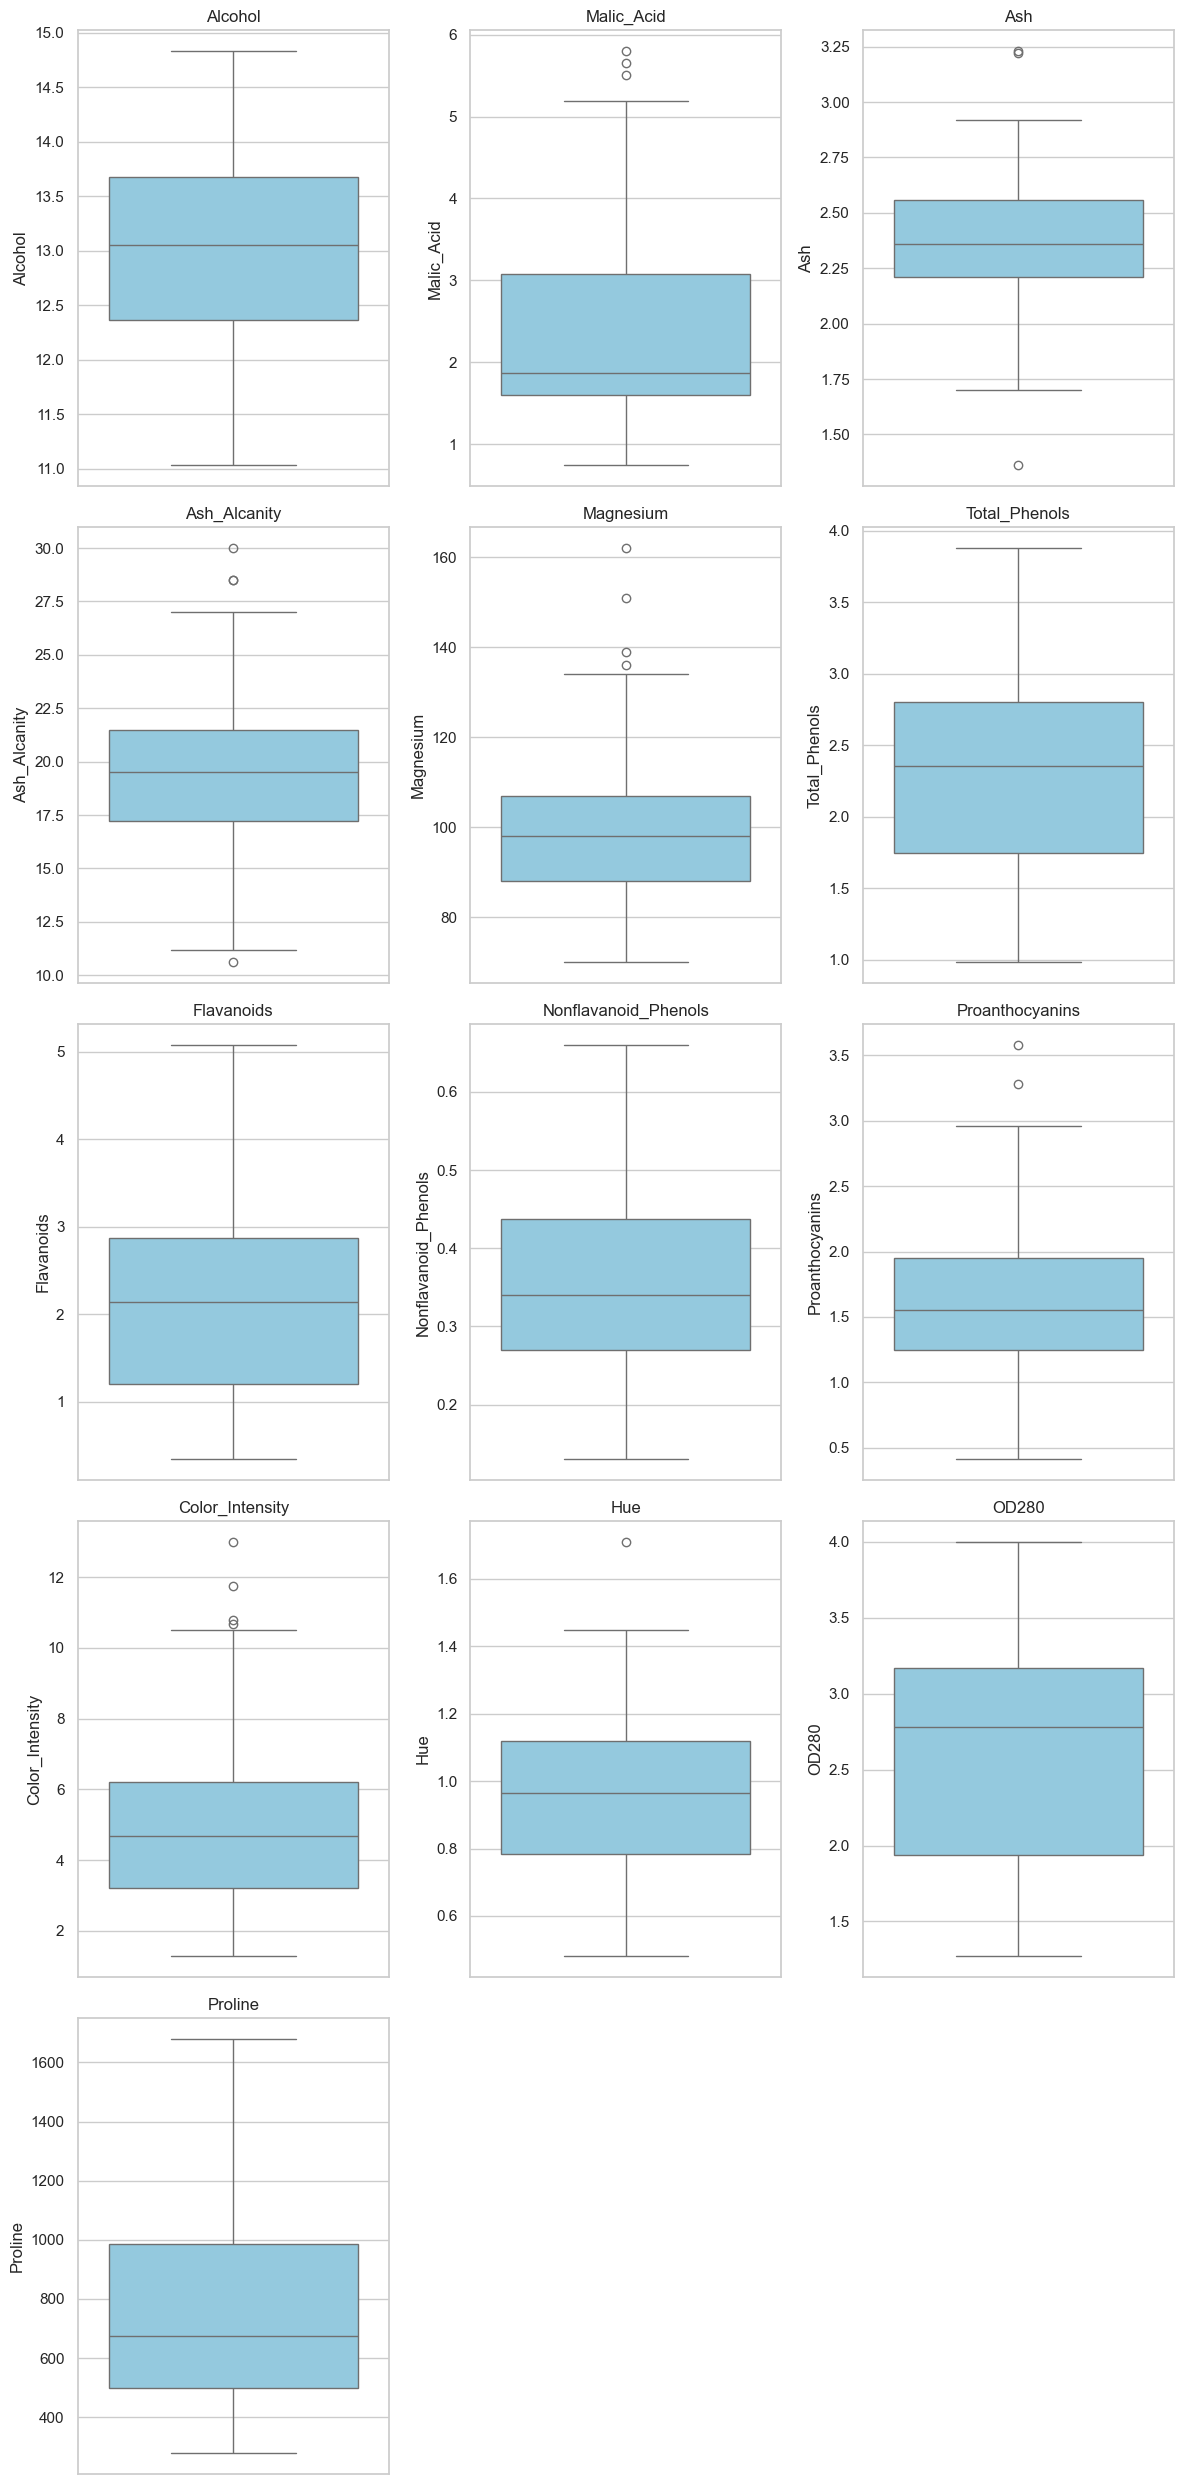

In [96]:
def box_plot(df):
    columns = df.columns 
    n_cols = 3  # Jumlah kolom per baris
    n_rows = math.ceil(len(columns) / n_cols)  # Hitung jumlah baris yang diperlukan
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 5 * n_rows))
    axes = axes.flatten()  
    
    for i, col in enumerate(columns):
        sns.boxplot(y=col, data=df, color='skyblue', ax=axes[i])
        axes[i].set_title(col)
    
    for j in range(len(columns), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
box_plot(df)

In [97]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df_count_out

,count_out
Alcohol,0
Malic_Acid,3
Ash,3
Ash_Alcanity,4
Magnesium,4
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,2
Color_Intensity,4


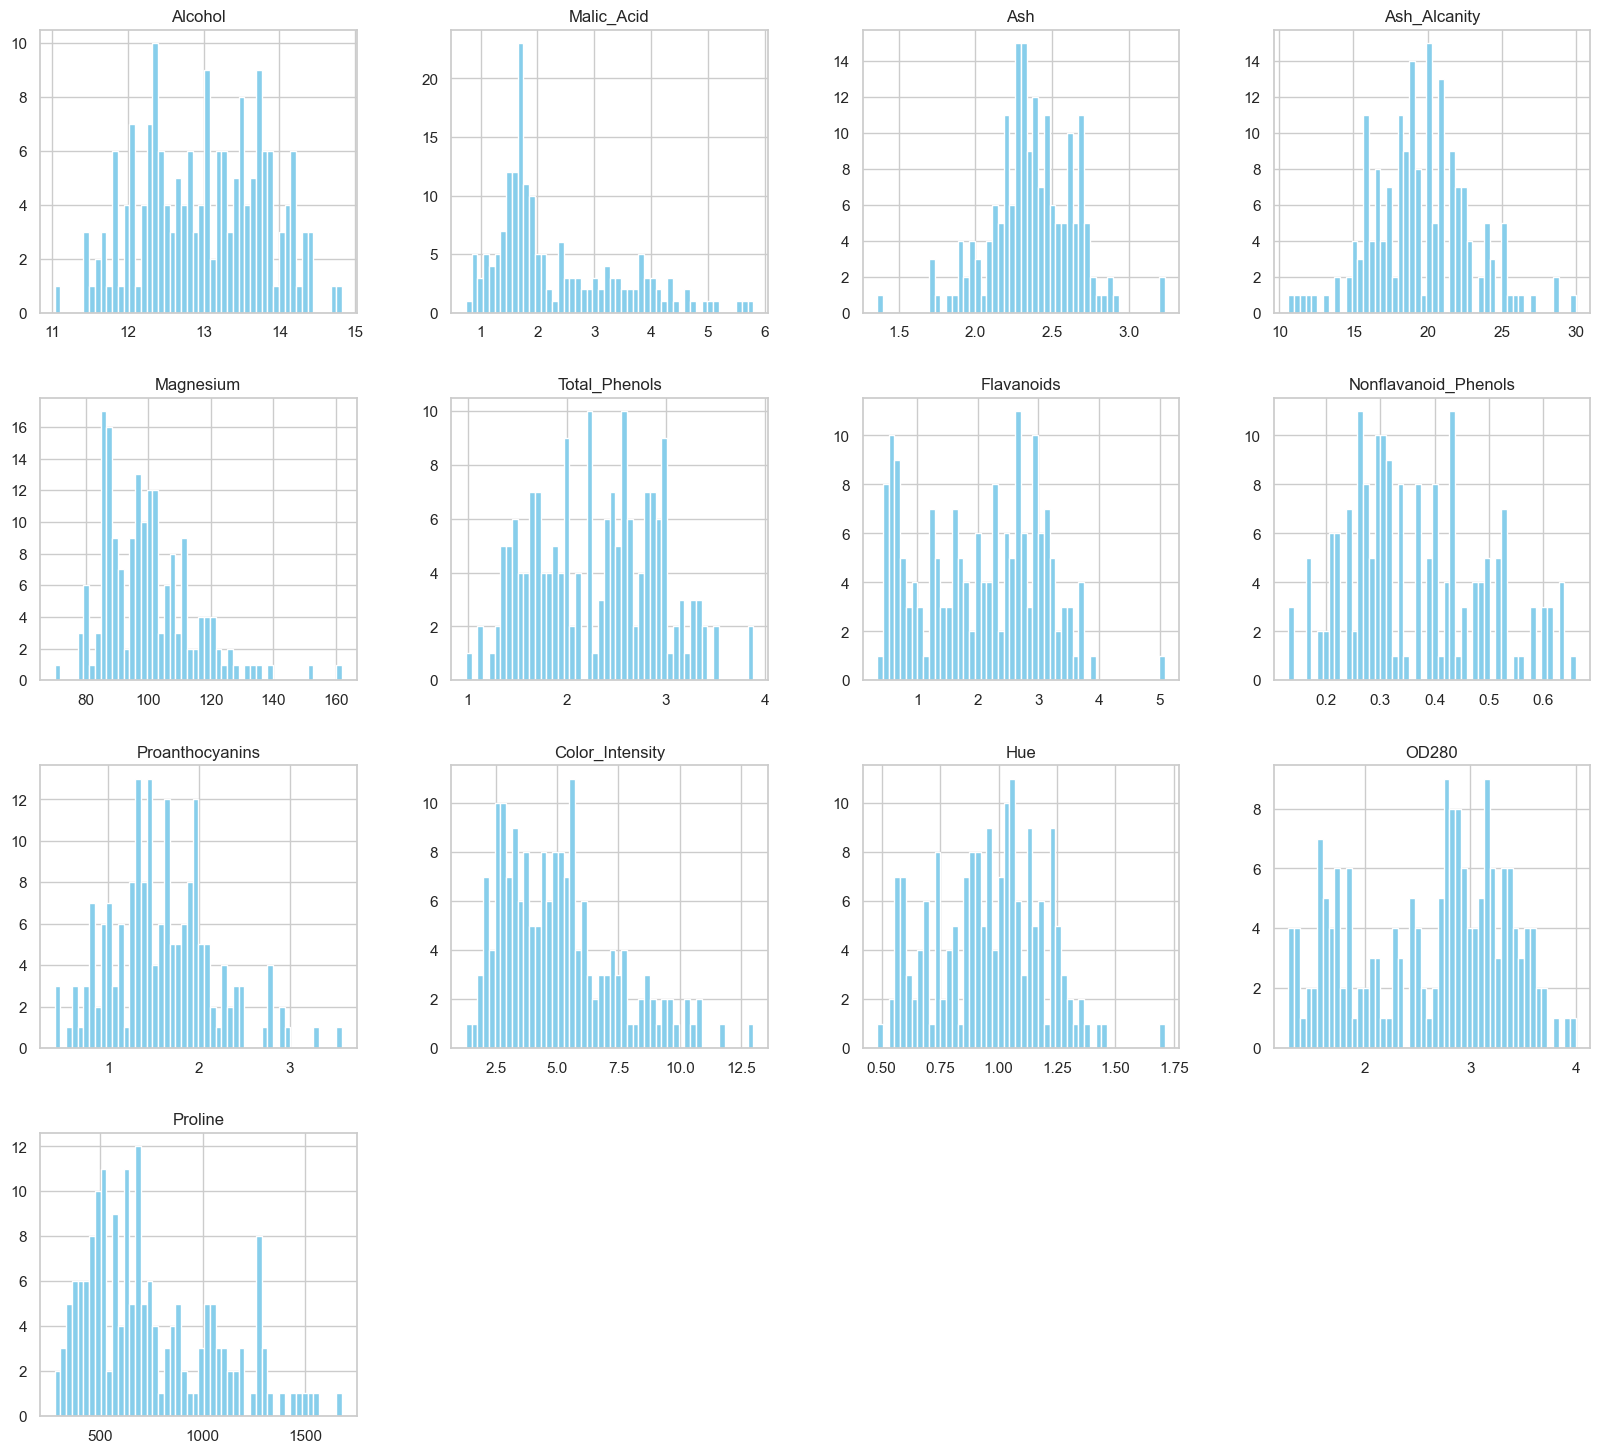

In [98]:
df.hist(bins=50, figsize=(20, 18), color='skyblue');

### Correlation

<Axes: >

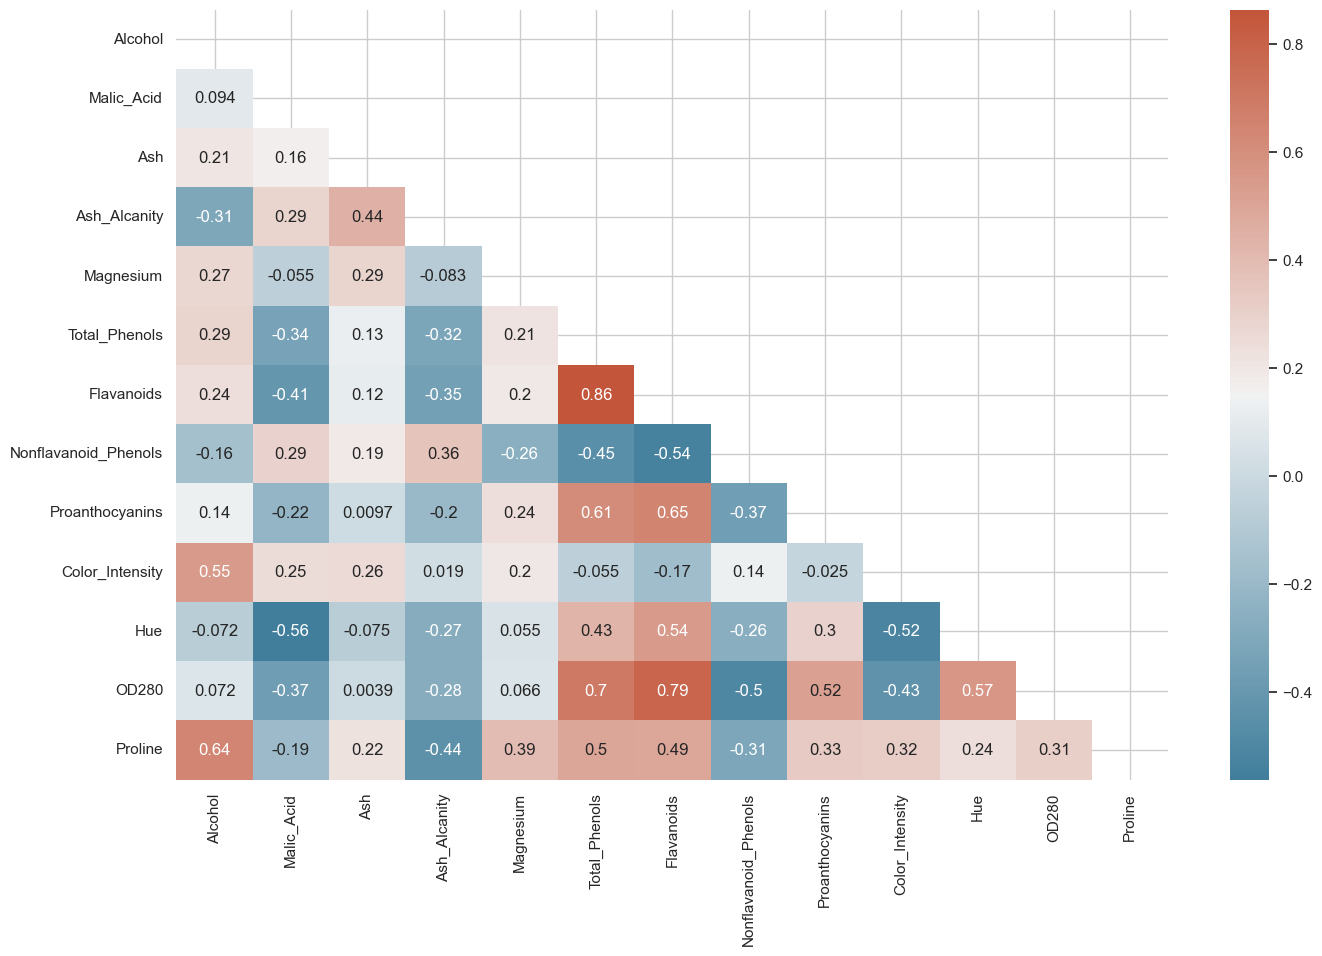

In [99]:
corr = df.corr()

f, ax = plt.subplots(figsize=(16, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Preprocessing

### Winsorize

In [100]:
def winsorize(data, columns_to_winsorize):
 for col in columns_to_winsorize:
   if col not in data.columns or not pd.api.types.is_numeric_dtype(data[col]):
     continue
   lower_bound = data[col].quantile(0.01, interpolation= 'nearest')
   upper_bound = data[col].quantile(0.99, interpolation= 'nearest')

   data.loc[data[col] < lower_bound, col] = lower_bound
   data.loc[data[col] > upper_bound, col] = lower_bound

columns_to_winsorize = df[['Malic_Acid','Ash','Ash_Alcanity', 'Magnesium', 'Proanthocyanins', 'Color_Intensity','Hue']]
winsorize(df, columns_to_winsorize)

### Remove Outlier

In [101]:
def remove_outlier(data):
    columns = df.select_dtypes(include=['int', 'float']).columns
    cleaned_data = data.copy()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75) 
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
        
    return cleaned_data


df = remove_outlier(df)

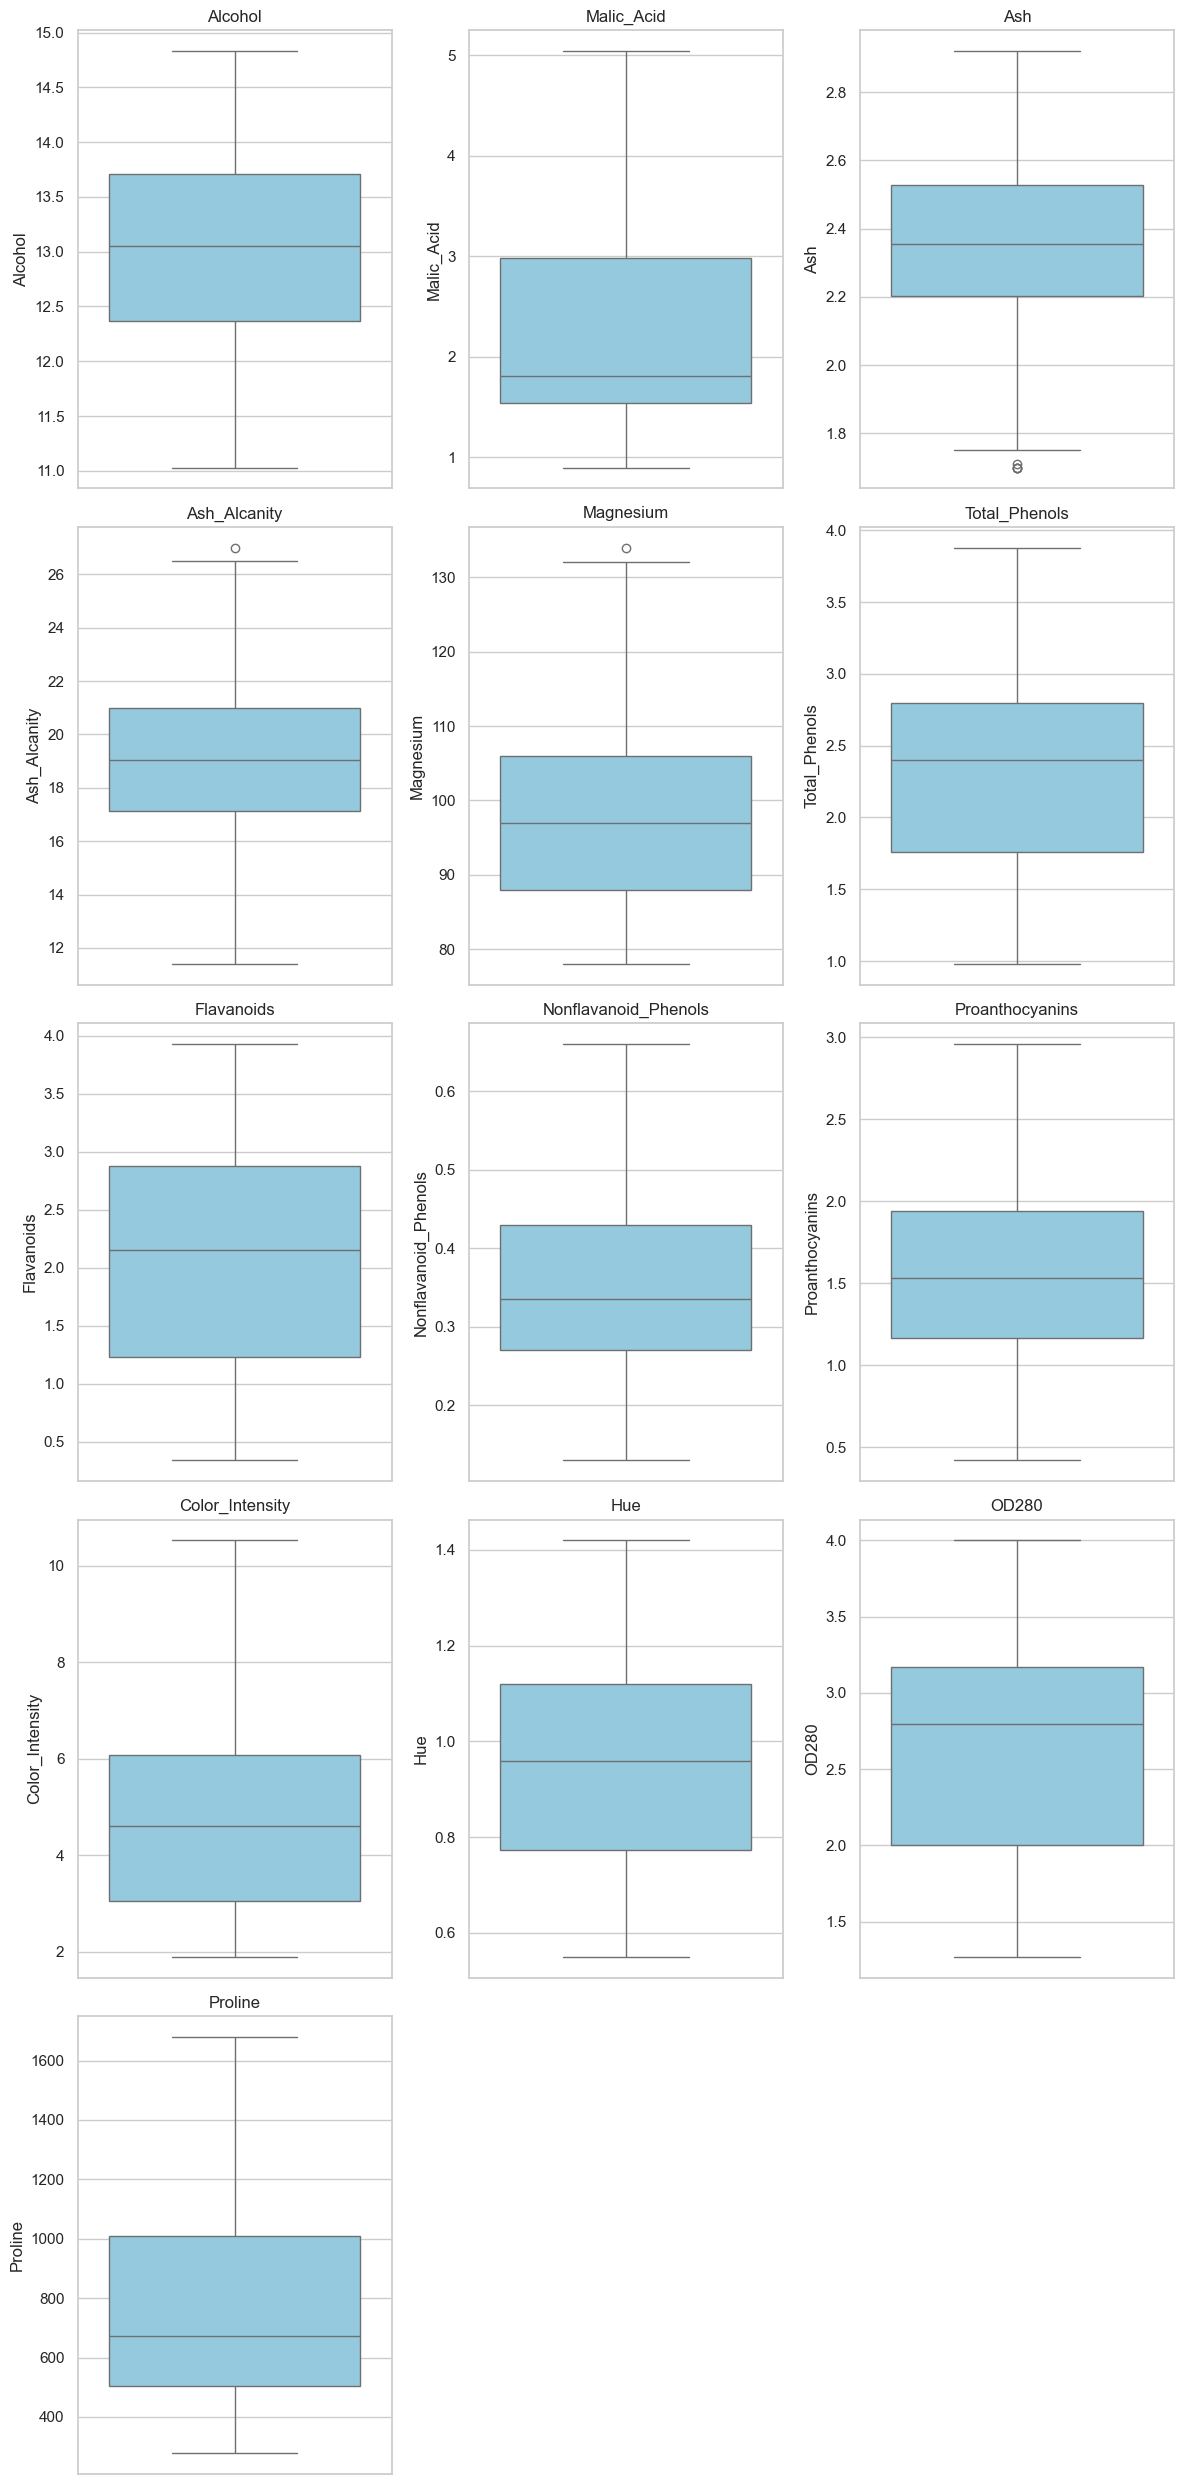

In [102]:
def box_plot(df):
    columns = df.columns 
    n_cols = 3  # Jumlah kolom per baris
    n_rows = math.ceil(len(columns) / n_cols)  # Hitung jumlah baris yang diperlukan
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 5 * n_rows))
    axes = axes.flatten()  
    
    for i, col in enumerate(columns):
        sns.boxplot(y=col, data=df, color='skyblue', ax=axes[i])
        axes[i].set_title(col)
    
    for j in range(len(columns), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
box_plot(df)

### Normalization

In [103]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[0.84210526, 0.19565217, 0.59836066, ..., 0.56321839, 0.97069597,
        0.56134094],
       [0.57105263, 0.21256039, 0.36065574, ..., 0.57471264, 0.78021978,
        0.55064194],
       [0.56052632, 0.352657  , 0.79508197, ..., 0.55172414, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.81642512, 0.45901639, ..., 0.04597701, 0.10622711,
        0.39728959],
       [0.56315789, 0.40821256, 0.54918033, ..., 0.05747126, 0.12820513,
        0.40085592],
       [0.81578947, 0.77294686, 0.85245902, ..., 0.06896552, 0.12087912,
        0.20114123]])

## Modelling

### K-Means

c:\Users\Arvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Arvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Arvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Arvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

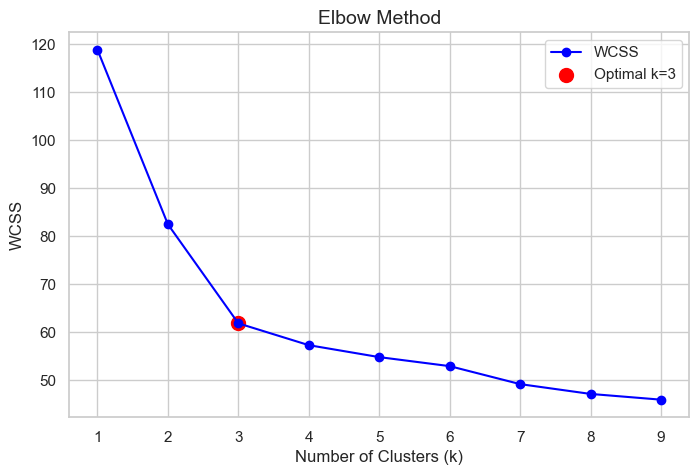

In [104]:
# Assuming X_scaled is already defined
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method with emphasis on k=3
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='blue', label='WCSS')
plt.scatter(3, wcss[2], color='red', s=100, label='Optimal k=3')  # Highlight k=3
plt.title('Elbow Method', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.xticks(range(1, 10))
plt.legend()
plt.grid(True)
plt.show()

In [105]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
y_pred1 = kmeans.fit_predict(X_scaled)

c:\Users\Arvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [106]:
df['Cluster'] = kmeans.labels_
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.4,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,0.90,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


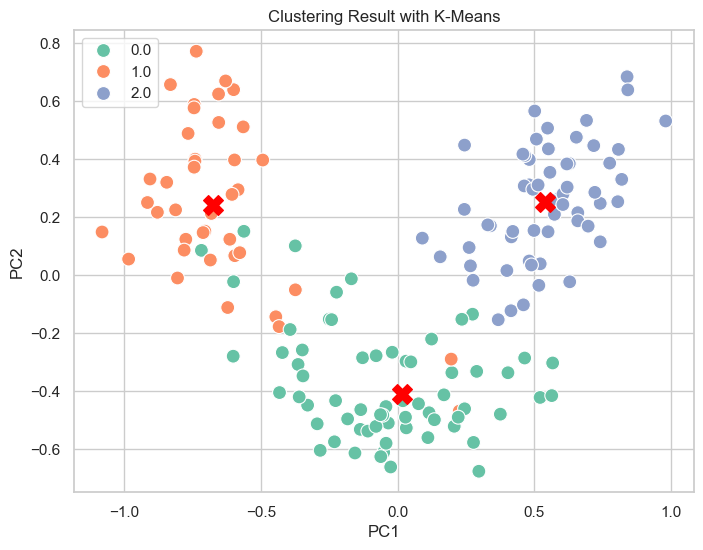

In [107]:
# Reduksi dimensi ke 2D dengan PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)

# Transform centroid KMeans ke ruang PCA
centroids = pca.transform(kmeans.cluster_centers_)  # Pastikan kmeans sudah didefinisikan sebelumnya

# Buat dataframe untuk visualisasi
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100, legend="full")

# Tambahkan centroid ke plot
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title('Clustering Result with K-Means')
plt.legend()
plt.show()


## Explore The Results!!!

Generating histograms...


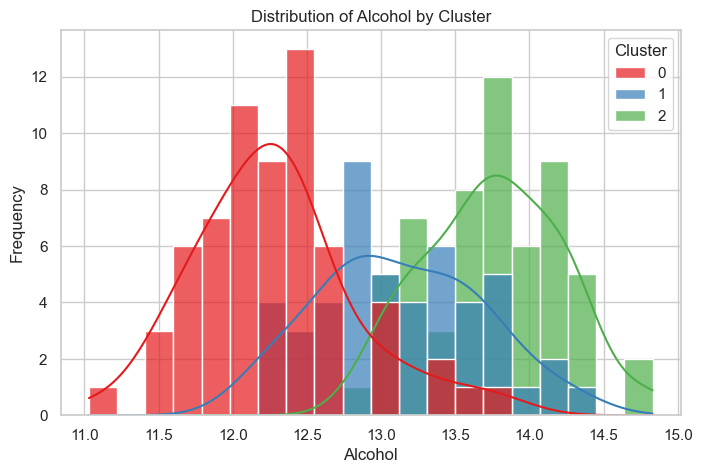

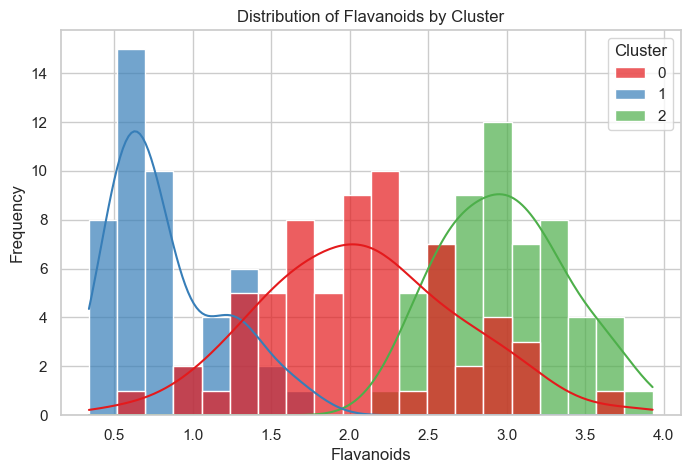

Generating box plots...


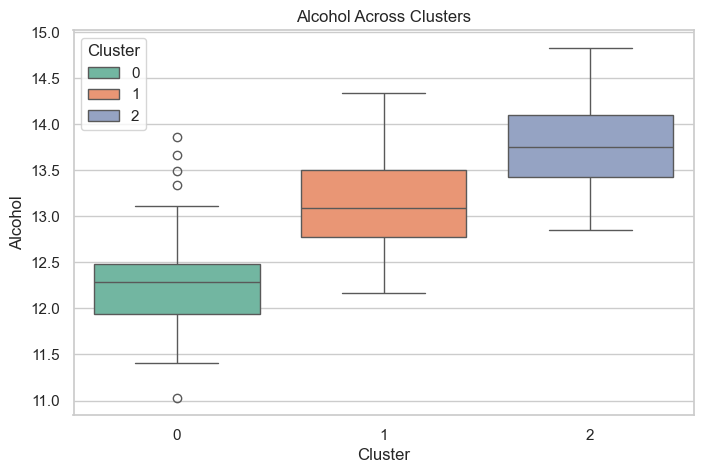

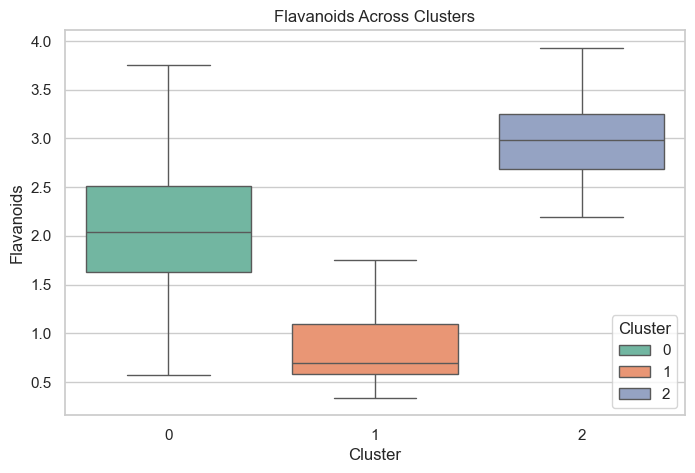

Generating pairwise scatter plots...


<Figure size 1000x800 with 0 Axes>

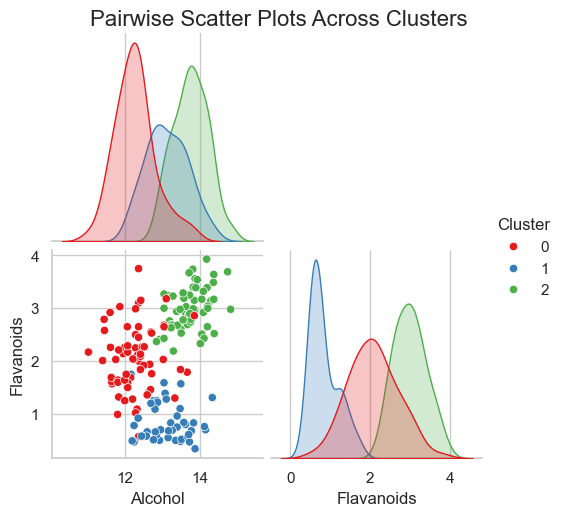

In [108]:
# Setting the style for plots
sns.set(style="whitegrid")

# List of fields for EDA
fields = ["Alcohol", "Flavanoids"]

# Function to plot histograms for each field, grouped by clusters
def plot_histograms(data, fields, cluster_col="Cluster"):
    for field in fields:
        plt.figure(figsize=(8, 5))
        hist_plot = sns.histplot(
            data=data,
            x=field,
            hue=cluster_col,
            kde=True,
            palette="Set1",
            bins=20,
            alpha=0.7,
        )
        
        # Extract handles and labels for legend
        handles, labels = hist_plot.get_legend_handles_labels()
        if handles and labels:  # Ensure legend is not empty
            plt.legend(handles=handles, labels=labels, title="Cluster", loc='upper right')
        
        plt.title(f"Distribution of {field} by Cluster")
        plt.xlabel(field)
        plt.ylabel("Frequency")
        plt.show()

# Function to plot box plots for each field, grouped by clusters
def plot_boxplots(data, fields, cluster_col="Cluster"):
    for field in fields:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=data, x=cluster_col, y=field, hue=cluster_col, palette="Set2")
        plt.title(f"{field} Across Clusters")
        plt.xlabel("Cluster")
        plt.ylabel(field)
        plt.legend(title="Cluster", loc='best')  # Adds a legend
        plt.show()

# Function to create pair plots for numerical fields to see scatter differences across clusters
def plot_pairwise_scatter(data, fields, cluster_col="Cluster"):
    plt.figure(figsize=(10, 8))
    sns.pairplot(data, vars=fields, hue=cluster_col, palette="Set1", diag_kind="kde", corner=True)
    plt.suptitle("Pairwise Scatter Plots Across Clusters", y=1.02, fontsize=16)
    plt.show()

# Perform EDA Visualization
print("Generating histograms...")
plot_histograms(df, fields)

print("Generating box plots...")
plot_boxplots(df, fields)

print("Generating pairwise scatter plots...")
plot_pairwise_scatter(df, fields)

In [109]:
df_count = df.groupby(by=["Cluster"]).size().reset_index(name="counts")
df_count

,Cluster,counts
0,0,64
1,1,48
2,2,58


Dari hasil yang diberikan dapat disimpulkan **klasterisasi amer** yang ada pada data secara singkatnya adalah:

1. **Amer 0** : merupakan amer berkadar **alcohol yang cenderung rendah** namun memiliki **rasa pahit yang cukup menengah**.
2. **Amer 1** : merupakan amer berkadar **alcohol menengah** dengan rasa yang **nyaris tidak pahit**.
3. **Amer 2** : merupakan amer berkadar **alcohol tinggi** dengan rasa yang **paling pahit** diantara lainnya.

Amer mana yang anda pilih?

Saya : Amer 2

### DBSCAN

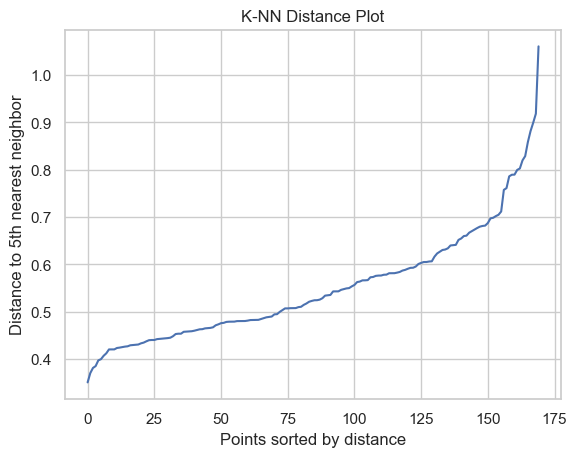

In [110]:
from sklearn.neighbors import NearestNeighbors

# Cari tetangga terdekat
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

# Sortir jarak untuk membuat plot
distances = np.sort(distances[:, -1]) 
plt.plot(distances)
plt.title('K-NN Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.show()

In [111]:
# Inisialisasi DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
y_pred2 = dbscan.fit_predict(X_scaled)

In [112]:
df['Cluster_DBSCAN'] = dbscan.labels_
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster,Cluster_DBSCAN
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,0
1,13.20,1.78,2.14,11.4,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,0.90,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1,1


In [113]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,  0,  0, -1,  0,  0,  0,
       -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

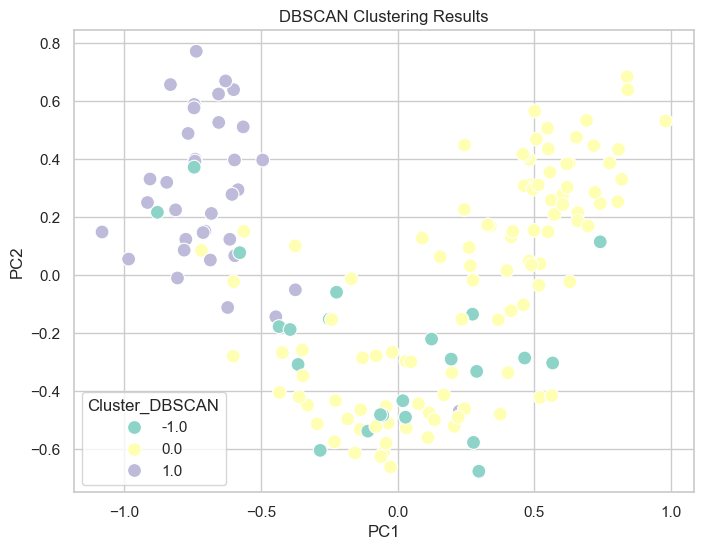

In [114]:
# Reduksi dimensi ke 2D untuk visualisasi
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)

# Buat dataframe untuk visualisasi
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['Cluster_DBSCAN'] = df['Cluster_DBSCAN']

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster_DBSCAN', palette='Set3', s=100, legend="full")
plt.title('DBSCAN Clustering Results')
plt.show()

### Notes:
`0 and 1` : its a real cluster defined based on the DBSCAN with the details params above

`-1` : its a noise point

## Evaluation

### Silhouette Score

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges between 
`−1` and `1`

**What it measures:**
- Cohesion (how close data points are within a cluster).
- Separation (how far apart different clusters are).

**General Rule:**
- Higher values (𝑠→1) are better, indicating well-separated and dense clusters.
- A score around 0 indicates overlapping clusters.
- Negative scores suggest misclassification.

In [115]:
# Menghitung silhoutte score algoritma KMeans
evaluasi_kmeans = silhouette_score(X_scaled, y_pred1)
print("Silhoutte Score K-Means:", evaluasi_kmeans)

Silhoutte Score K-Means: 0.29272929637829037


In [116]:
# Menghitung silhoutte score algoritma KMeans
evaluasi_dbscan = silhouette_score(X_scaled, y_pred2)
print("Silhoutte Score DBSCAN:", evaluasi_dbscan)

Silhoutte Score DBSCAN: 0.20872937101809533


### Davies Bouldin Index Score

The Davies-Bouldin Index (DBI) measures the average similarity ratio of each cluster with its most similar (i.e. closest) cluster. It ranges from 
0 to ∞, where lower values are better.

**Interpretation:**
- A lower DBI indicates better-defined clusters, with smaller intra-cluster distances and larger inter-cluster distances.
- 𝐷𝐵𝐼 = 0 is a perfect clustering (theoretically).

In [117]:
dbi_kmeans = davies_bouldin_score(X_scaled, y_pred1)
print("DBI Score K-Means:", dbi_kmeans)

DBI Score K-Means: 1.3200362720638548


In [118]:
dbi_dbscan = davies_bouldin_score(X_scaled, y_pred2)
print("DBI Score DBSCAN:", dbi_dbscan)

DBI Score DBSCAN: 2.6809845138076214


## Conclusion

K-means better in this case. DBSCAN sucks.